In [2]:
import sys
sys.path.append("..")
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
os.environ['LD_PRELOAD']

'/usr/lib/x86_64-linux-gnu/libtcmalloc_minimal.so.4'

In [3]:
import dccs.config as cfg
from dccs.math.algebra import quaternion_to_angles

In [4]:
from dccs.math.camera_model import CameraData

In [5]:
half_log = "/home/drv/magisterka/plot_logfile_9991_half"
full_log = "/home/drv/magisterka/plot_logfile_9991_full"

In [6]:
pos = ["x", "y", "z"]
ang = ["p", "q", "r"]
def v(pos):
    return ["v"+p for p in pos]
def e(pos):
    return ["e"+p for p in pos]
def r(pos):
    return ["r"+p for p in pos]

In [7]:
data_full = pd.read_csv(full_log, sep=";", names=["t"] + pos + v(pos) + ang + v(ang) + e(pos) + e(ang) + r(pos) + ["q"+str(i) for i in range(4)])
data_half = pd.read_csv(half_log, sep=";", names=["t"] + pos + v(pos) + ang + v(ang) + e(pos) + e(ang) + r(pos) + ["q"+str(i) for i in range(4)])

In [8]:
def angle(row):
    q = quaternion_to_angles(np.array(row[-4:])) # radians
    q = q * 180 / np.pi # degrees
    row['a0'] = q[0]
    row['a1'] = q[1] 
    row['a2'] = q[2]
    return row

edata_full = data_full.apply(angle, axis=1)
edata_half = data_half.apply(angle, axis=1)

In [9]:
edata_full.std()[["rx", "ry", "rz", "a0", "a1", "a2"]]

rx    0.001173
ry    0.001458
rz    0.001355
a0    0.031820
a1    0.064676
a2    0.040496
dtype: float64

In [10]:
full_r = edata_full.mean()[["rx", "ry", "rz"]]
["{:.3}%".format(x*100) for x in edata_full.std()[["rx", "ry", "rz"]] / np.linalg.norm(full_r)]

['0.128%', '0.159%', '0.148%']

In [11]:
half_r = edata_half.mean()[["rx", "ry", "rz"]]
["{:.3}%".format(x*100) for x in edata_half.std()[["rx", "ry", "rz"]] / np.linalg.norm(half_r)]

['0.0422%', '0.0349%', '0.0591%']

In [12]:
edata_half.std()[["rx", "ry", "rz", "a0", "a1", "a2"]]

rx    0.000902
ry    0.000745
rz    0.001262
a0    0.030406
a1    0.021418
a2    0.028434
dtype: float64

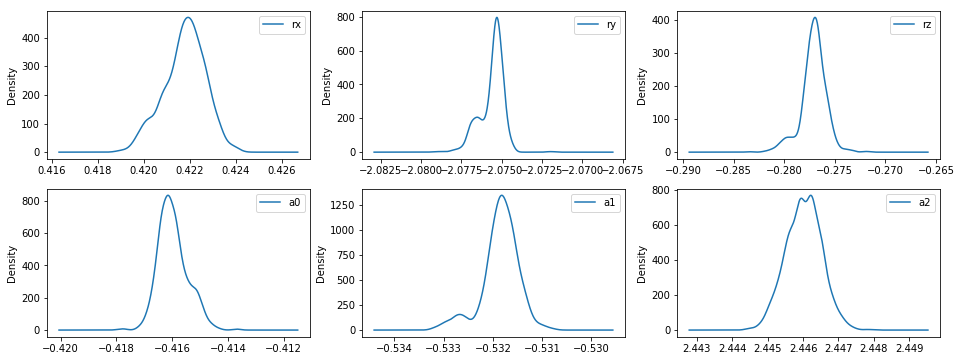

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,6))
edata_half.plot(y=['rx'], kind='kde', ax=axes[0,0])
edata_half.plot(y=['ry'], kind='kde', ax=axes[0,1])
edata_half.plot(y=['rz'], kind='kde', ax=axes[0,2])

edata_half.plot(y=['a0'], kind='kde', ax=axes[1,0])
edata_half.plot(y=['a1'], kind='kde', ax=axes[1,1])
edata_half.plot(y=['a2'], kind='kde', ax=axes[1,2])
fig.savefig("/home/drv/magisterka/kde_pose_half.png")

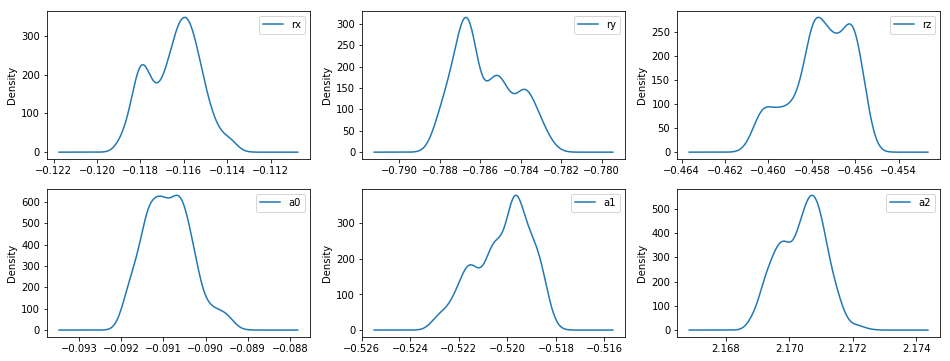

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,6))
edata_full.plot(y=['rx'], kind='kde', ax=axes[0,0])
edata_full.plot(y=['ry'], kind='kde', ax=axes[0,1])
edata_full.plot(y=['rz'], kind='kde', ax=axes[0,2])

edata_full.plot(y=['a0'], kind='kde', ax=axes[1,0])
edata_full.plot(y=['a1'], kind='kde', ax=axes[1,1])
edata_full.plot(y=['a2'], kind='kde', ax=axes[1,2])
fig.savefig("/home/drv/magisterka/kde_pose_full.png")

In [15]:
edata.plot(y=['p','a0'], figsize=(16,4))
edata.plot(y=['q','a1'], figsize=(16,4))
edata.plot(y=['r','a2'], figsize=(16,4))
edata.plot(y=['x','rx'], figsize=(16,4))
edata.plot(y=['y','ry'], figsize=(16,4))
edata.plot(y=['z','rz'], figsize=(16,4))

NameError: name 'edata' is not defined

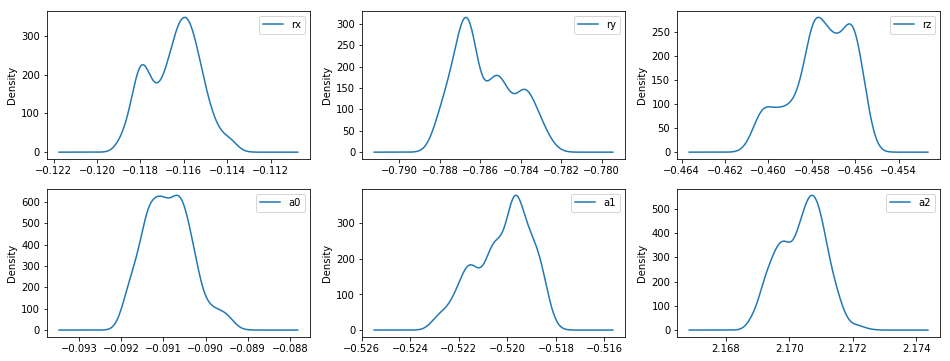

In [205]:
print("Half pose len: ", np.sqrt(sum([x**2 for x in edata_half.mean()[["x", "y", "z"]]])))
print("Full pose len: ", np.sqrt(sum([x**2 for x in edata_full.mean()[["x", "y", "z"]]])))

Half pose len:  2.1360709227074297
Full pose len:  0.9167081555050882
